# 인공지능 22/06/07
## 2019130044 손영채

## UniversalBank 데이터
- 문제: 고객의 다양한 데이터를 기반을 개인 대출 수락 여부 예측
- 불필요하다고 판단되는 변수 제거
- 카테고리 데이터 경우 dummy 변수(one-hot vector로 변환)
- y값 시각화
- decision tree, knn, bagging, random forest, adaboost, gradient boost 선택
- Train test 0.25 비율로 나눈 후 학습 및 테스트
- 검증 -f1,recall,acc 지표 활용

In [336]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns
import time


In [337]:
df = pd.read_csv ('UniversalBank.csv')

#### 불필요한 변수 제거

In [338]:
X=df.drop(['ID','ZIP Code','Personal Loan'],axis=1)

#### Education dummy 처리 완료

In [339]:
df=pd.get_dummies(df,columns=['Education'])

In [340]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard', 'Education_1', 'Education_2', 'Education_3'],
      dtype='object')

In [341]:
feature_names=X.columns.tolist()

In [342]:
Y=df['Personal Loan']

#### Y 변수 시각화

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

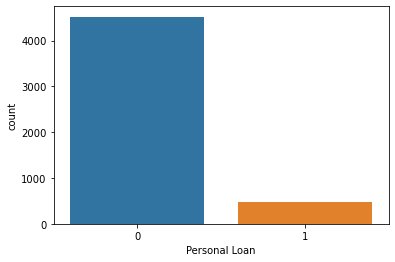

In [343]:
sns.countplot(x=Y)

# Decission Tree

In [344]:
tr_x,ts_x, tr_y, ts_y = train_test_split(X,Y, test_size = 0.25)

In [345]:
dt=DT(random_state=10)

In [346]:
dt.fit(tr_x,tr_y)

DecisionTreeClassifier(random_state=10)

#### 중요 변수

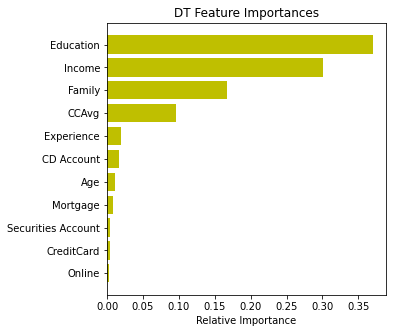

In [347]:
features = feature_names
importances = dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('DT Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [348]:
y_train_pred = dt.predict(tr_x)

In [349]:
y_test_pred=dt.predict(ts_x)

In [350]:
acc = accuracy_score(y_true=ts_y, y_pred=y_test_pred)
recall = recall_score(y_true=ts_y, y_pred=y_test_pred)
f1 = f1_score(y_true=ts_y, y_pred=y_test_pred)

print('DT classification')
print('acc={:.3f},recall={:.3f},f1_score={:.3f}'.format(acc,recall,f1))

DT classification
acc=0.985,recall=0.917,f1_score=0.921


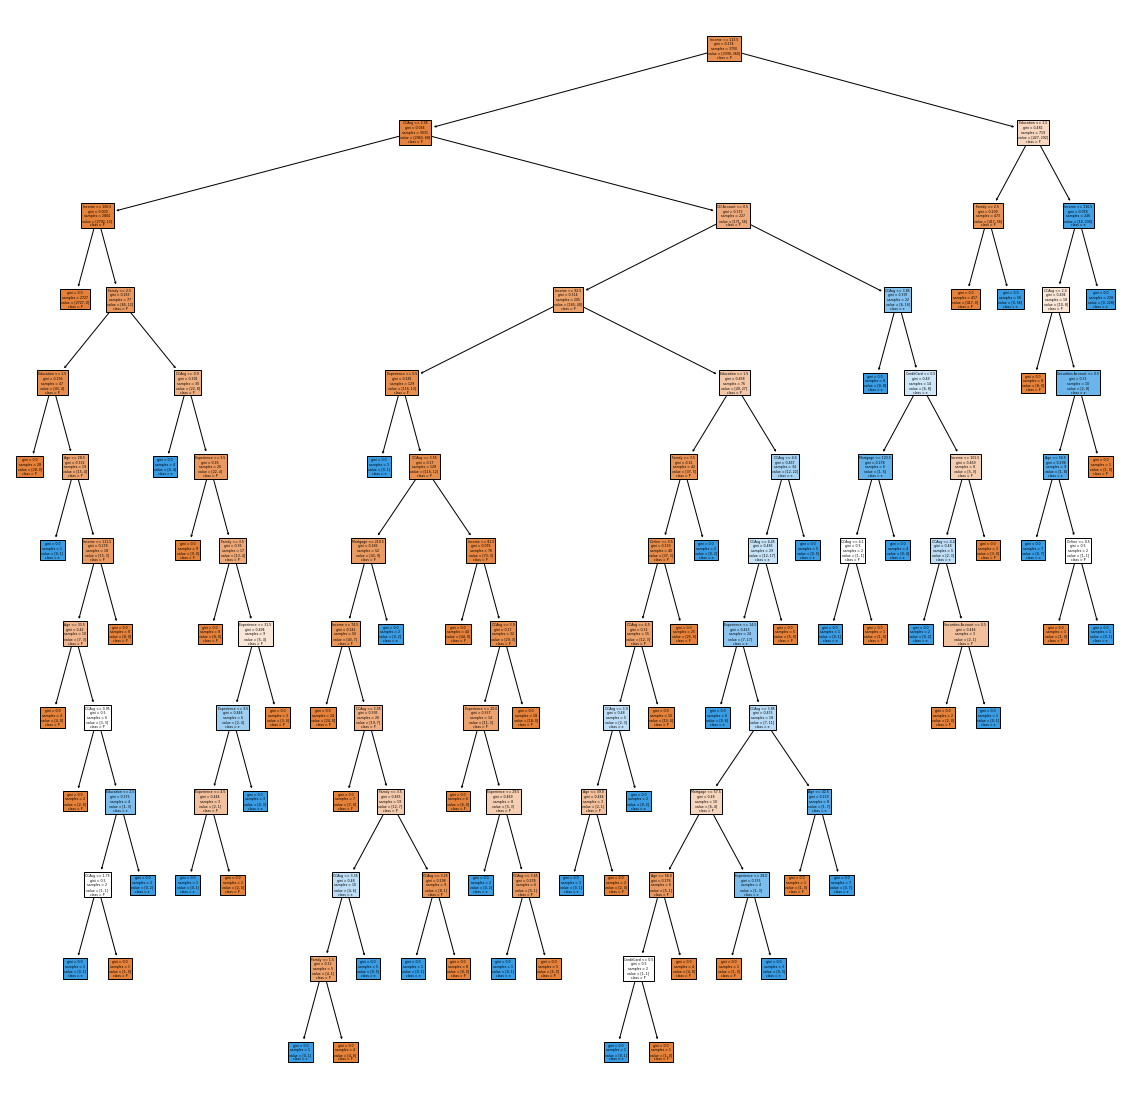

In [351]:
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_names,  
                   class_names='Personal Loan',
                   filled=True)
fig.savefig('tree.png')

In [352]:
text_representation = tree.export_text(dt,feature_names =  list(feature_names))
print(text_representation)

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Income <= 111.50
|   |   |   |   |   |   |   |--- Age <= 33.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Age >  33.50
|   |   |   |   |   |   |   |   |--- CCAvg <= 0.95
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- CCAvg >  0.95
|   |   |   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- CCAvg <= 1.75
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- CCAvg >  1.75
|   |   |   |   |   |   |   |   |   |   

# Gradient Boosting Classifier

In [353]:
from sklearn.ensemble import GradientBoostingClassifier 

In [354]:
GBC=GradientBoostingClassifier()

In [355]:
GBC.fit(tr_x,tr_y)

GradientBoostingClassifier()

#### 중요 변수

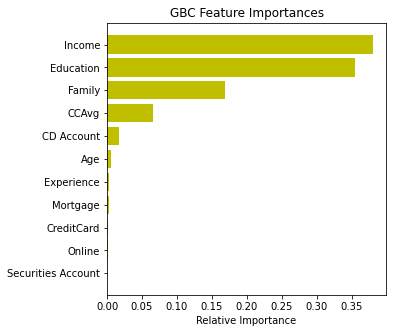

In [356]:
features = feature_names
importances = GBC.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('GBC Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [357]:
Gpred_y=GBC.predict(ts_x)

In [358]:
acc = accuracy_score(y_true=ts_y, y_pred=Gpred_y)
recall = recall_score(y_true=ts_y, y_pred=Gpred_y)
f1 = f1_score(y_true=ts_y, y_pred=Gpred_y)

print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}'.format(acc,recall,f1))

acc=0.992, recall=0.950, f1_score=0.958


# Random Forest

In [359]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [360]:
rf.fit(tr_x, tr_y)

RandomForestClassifier()

#### 중요 변수

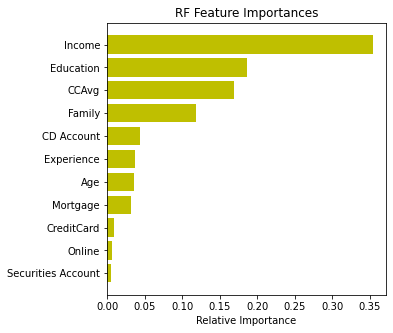

In [361]:
features = feature_names
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(5,5))
plt.title('RF Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [362]:
Rpred_y=rf.predict(ts_x)

In [363]:
acc = accuracy_score(y_true=ts_y, y_pred=Rpred_y)
recall = recall_score(y_true=ts_y, y_pred=Rpred_y)
f1 = f1_score(y_true=ts_y, y_pred=Rpred_y)

print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}'.format(acc,recall,f1))

acc=0.992, recall=0.925, f1_score=0.957


# 결론

### 각 알고리즘별 Acc, Recall, F1 Score

: Decission Tree Classifier 보다는 앙상블 모델인 Gradient Boosting이나 Random Forest의 F1_Score가 높다

#### Decission Tree Classifier

In [364]:
acc = accuracy_score(y_true=ts_y, y_pred=y_test_pred)
recall = recall_score(y_true=ts_y, y_pred=y_test_pred)
f1 = f1_score(y_true=ts_y, y_pred=y_test_pred)

print('DT classification')
print('acc={:.3f},recall={:.3f},f1_score={:.3f}'.format(acc,recall,f1))

DT classification
acc=0.985,recall=0.917,f1_score=0.921


#### Gradient Boosting Classifier

In [365]:
acc = accuracy_score(y_true=ts_y, y_pred=Gpred_y)
recall = recall_score(y_true=ts_y, y_pred=Gpred_y)
f1 = f1_score(y_true=ts_y, y_pred=Gpred_y)

print('Gradient Boosting Classifier')
print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}'.format(acc,recall,f1))

Gradient Boosting Classifier
acc=0.992, recall=0.950, f1_score=0.958


#### Random Forest Classifier

In [366]:
acc = accuracy_score(y_true=ts_y, y_pred=Rpred_y)
recall = recall_score(y_true=ts_y, y_pred=Rpred_y)
f1 = f1_score(y_true=ts_y, y_pred=Rpred_y)

print('Random Forest')
print('acc={:.3f}, recall={:.3f}, f1_score={:.3f}'.format(acc,recall,f1))

Random Forest
acc=0.992, recall=0.925, f1_score=0.957


### 각 알고리즘별 최적의 Parameter

In [367]:
def clf3():
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier() 
    dt = DecisionTreeClassifier()
  
    return rf, gb, dt

rf_parameters ={'max_depth' : [3,5,7,9] , 'n_estimators': [3,5,7,9]}
gb_parameters ={'max_depth' : [3,5,7,9] , 'n_estimators': [3,5,7,9]}
dt_parameters ={'max_depth' : [3,5,7,9] }

from sklearn import model_selection
rf, gb, dt = clf3()
grid_search_rf = model_selection.GridSearchCV ( estimator = rf, param_grid = rf_parameters, scoring = 'f1', cv = 10 )
start = time.time()
grid_search_rf.fit( tr_x, tr_y )
RF_time=time.time() - start
best_rf = grid_search_rf.best_estimator_

grid_search_gb = model_selection.GridSearchCV ( estimator = gb, param_grid = gb_parameters, scoring = 'f1', cv = 10 )
start = time.time()
grid_search_gb.fit( tr_x, tr_y )
GBC_time=time.time() - start
best_gb = grid_search_gb.best_estimator_

grid_search_dt = model_selection.GridSearchCV ( estimator = dt, param_grid = dt_parameters, scoring = 'f1', cv = 10 )
start = time.time()
grid_search_dt.fit( tr_x, tr_y )
DT_time=time.time() - start
best_dt = grid_search_dt.best_estimator_


In [368]:
best_dt

DecisionTreeClassifier(max_depth=5)

In [369]:
best_gb

GradientBoostingClassifier(max_depth=9, n_estimators=9)

In [370]:
best_rf

RandomForestClassifier(max_depth=9, n_estimators=9)

### 각 알고리즘별 학습 소요 시간

: Gradient Boosting의 학습 소요 시간이 가장 길다

In [371]:
print('Decission Tree = {:.3f}s \nGradient Boosting = {:.3f}s \nRandom Forest = {:.3f}s'.format(DT_time,GBC_time,RF_time))

Decission Tree = 0.284s 
Gradient Boosting = 4.817s 
Random Forest = 2.852s
